#### 1. Import libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

#### 2. Cargue de tablas

In [23]:
df_train = pd.read_csv(r'C:\Users\usuario\Documents\MLOPS\Churn\data\customer_churn_dataset-training-master.csv')
print(df_train.shape)
df_train.head()

(440833, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [24]:
df_test = pd.read_csv(r'C:\Users\usuario\Documents\MLOPS\Churn\data\customer_churn_dataset-testing-master.csv')
print(df_test.shape)
df_test.head()

(64374, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


#### 3. Exploration

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [39]:
df_train['Churn'].value_counts(normalize=True)

Churn
1.0    0.567107
0.0    0.432893
Name: proportion, dtype: float64

#### 4.Featuring

In [53]:
df1 = df_train.copy()

In [54]:
df1.dropna(inplace=True)

In [55]:
df1.columns = [col.replace(' ','_') for col in df1.columns]

In [56]:
categorical_features = df1.select_dtypes('object').columns.tolist()
categorical_features

['Gender', 'Subscription_Type', 'Contract_Length']

In [57]:
df1 = pd.get_dummies(df1, columns=categorical_features, drop_first=True, dtype='int')

In [58]:
df1 = df1[['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction','Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly', 'Churn']]

In [36]:
numerical_features = df1.select_dtypes('float').columns.tolist()
numerical_features

['Age',
 'Tenure',
 'Usage_Frequency',
 'Support_Calls',
 'Payment_Delay',
 'Total_Spend',
 'Last_Interaction',
 'Churn']

In [59]:
numerical_features = list(df1.iloc[:,:-6])
scaler = StandardScaler()

for feature in numerical_features:
    df1[feature] = scaler.fit_transform(df1[[feature]])

#### 5. Modelling

In [60]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

##### 5.1. Logistic regression

In [61]:
lr = LogisticRegression(random_state=42)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [62]:
def results(y_pred):
    """
    Input:
        - y_pred: 1D-array containing predictions 
    Output:
        - results: dictionnary containing the metrics from predictions
        
    Returns metrics (accuracy, precision, recall, f1 and roc auc scores) from predictions
    """
    results = {}
    
    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['recall'] = recall_score(y_test, y_pred)
    results['f1_score'] = f1_score(y_test, y_pred)
    results['roc_auc_score'] = roc_auc_score(y_test, y_pred)
    
    return results

In [63]:
results(y_pred)

{'accuracy': 0.8958487712665406,
 'precision': np.float64(0.9267301375201826),
 'recall': np.float64(0.8866693301371688),
 'f1_score': np.float64(0.9062572311377898),
 'roc_auc_score': np.float64(0.8972884789244275)}

<Axes: >

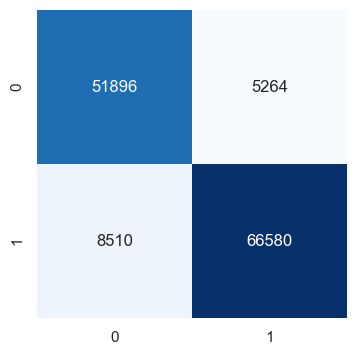

In [64]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=None)

##### 5.2. RandomForest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier(random_state=46)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=46)

In [67]:
y_pred_rf = rf.predict(X_test)

In [68]:
results(y_pred_rf)

{'accuracy': 0.9994782608695653,
 'precision': np.float64(0.9999733422192603),
 'recall': np.float64(0.9991077373818085),
 'f1_score': np.float64(0.999540352396496),
 'roc_auc_score': np.float64(0.9995363739393297)}

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", f"{accuracy:.2%}")

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57160
         1.0       1.00      1.00      1.00     75090

    accuracy                           1.00    132250
   macro avg       1.00      1.00      1.00    132250
weighted avg       1.00      1.00      1.00    132250

Accuracy: 99.95%


##### 5.3. GBM

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)

In [73]:
y_pred_gb = clf.predict(X_test)

In [74]:
report = classification_report(y_test, y_pred_gb)
print("Classification Report:")
print(report)

accuracy = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", f"{accuracy:.2%}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     57160
         1.0       1.00      0.97      0.99     75090

    accuracy                           0.98    132250
   macro avg       0.98      0.99      0.98    132250
weighted avg       0.98      0.98      0.98    132250

Accuracy: 98.43%


#### 6. OOT

In [83]:
df2 = df_test.copy()

In [84]:
df2.columns = [col.replace(' ','_') for col in df2.columns]

In [85]:
df2 = pd.get_dummies(df2, columns=categorical_features, drop_first=True, dtype='int')

In [86]:
df2 = df2[['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction','Gender_Male',
       'Subscription_Type_Premium', 'Subscription_Type_Standard',
       'Contract_Length_Monthly', 'Contract_Length_Quarterly', 'Churn']]

In [87]:
numerical_features = list(df2.iloc[:,:-6])
scaler = StandardScaler()

for feature in numerical_features:
    df2[feature] = scaler.fit_transform(df2[[feature]])

In [88]:
X_oot = df2.iloc[:,:-1]
y_oot = df2.iloc[:,-1]

In [89]:
y_pr_oot = lr.predict(X_oot)

In [90]:
report = classification_report(y_oot, y_pr_oot)
print("Classification Report:")
print(report)

accuracy = accuracy_score(y_oot, y_pr_oot)
print("Accuracy:", f"{accuracy:.2%}")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.40      0.54     33881
           1       0.58      0.90      0.70     30493

    accuracy                           0.64     64374
   macro avg       0.70      0.65      0.62     64374
weighted avg       0.70      0.64      0.62     64374

Accuracy: 63.98%


In [91]:
y_rf_oot = rf.predict(X_oot)

In [92]:
report = classification_report(y_oot, y_rf_oot)
print("Classification Report:")
print(report)

accuracy = accuracy_score(y_oot, y_rf_oot)
print("Accuracy:", f"{accuracy:.2%}")

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.14      0.24     33881
           1       0.50      0.97      0.66     30493

    accuracy                           0.53     64374
   macro avg       0.67      0.55      0.45     64374
weighted avg       0.68      0.53      0.44     64374

Accuracy: 53.20%


In [93]:
y_gb_oot = clf.predict(X_oot)

In [94]:
report = classification_report(y_oot, y_gb_oot)
print("Classification Report:")
print(report)

accuracy = accuracy_score(y_oot, y_gb_oot)
print("Accuracy:", f"{accuracy:.2%}")

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.19      0.31     33881
           1       0.51      0.94      0.66     30493

    accuracy                           0.55     64374
   macro avg       0.65      0.57      0.49     64374
weighted avg       0.66      0.55      0.48     64374

Accuracy: 54.92%
